In [96]:
# Import Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

In [97]:
# Load DataSet
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [98]:
# Drop Column
df.drop('customerID', axis=1, inplace=True)

In [99]:
# Converting object Datatype to numeric 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [103]:
# LabelEncoding 
cat_cols = df.select_dtypes(include='object').columns.tolist()

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [104]:
# Feature and Target 
x = df.iloc[:,:-1]
y = df['Churn']

In [105]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [106]:
# Balancing imbalance data using RandomOverSampling
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x,y)
y_ros.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [23]:
# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42)

In [89]:
# Define param grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# GridSearchCV with recall as scoring metric
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='recall',
    cv=5
)

# Fit the model
grid.fit(x_train, y_train)
model = grid.best_estimator_
y_pred = model.predict(x_test)

In [90]:
# Evaluation
print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)
print("Recall: ", recall_score(y_test, y_pred) * 100)

Accuracy:  90.14492753623189
Recall:  95.13822688274547


In [93]:
cf = confusion_matrix(y_test, y_pred)

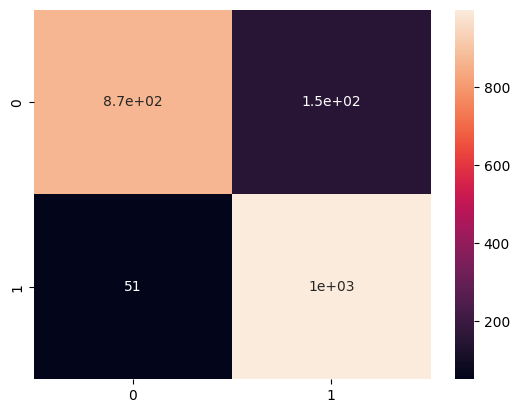

In [94]:
# Confution Matrix
sns.heatmap(cf, annot=True)
plt.show()